
<a id="1"></a>
# 1 Introdução

Quem nunca recebeu aquela ligaçãode uma empresa tentando ofertando um produto que você não tem interesse nem de ouvir. Hoje uma das grandes dificuldades do mercado de telemarketing é achar o público alvo correto para um produto específico.

Esse projeto tem como objetivo aumentar essa eficácia em achar esses clientes corretos, de modo que não gere nenhuma decorrencia de estresse entre empresa e cliente e que também aumente a produtividade da empresa de telemarketing.


**Entendendo os dados** 

Os dados contém 68 variantes, nas quais estão divididas em:

- 51.4% Qualitativo Nominal

- 25,7% Quantitativo Discreto

- 17,1% Quantitativo continua

- 5,7% Qualitativo ordinal

O flag de cliente interessados tem valor binário, podendo a previsão ter um valor de  0,0  ou 1,0, representando a probabilidade de uma afirmação ou um interesse à aquele produto. Os recursos neste conjunto de dados foram tornados anônimos e não contém dados ausentes.


A métrica de avaliação do machine learning será avaliadas em **área sob a curva ROC AUC** entre a probabilidade prevista e a meta observada.





<a id="2"></a>
# 2 Preparação
As bibliotecas que serão carregadas são principalmente para manipulação, visualização e modelagem de dados. O conjunto de dados que são usados na análise foram separados entre treinamento e de teste. O principal objetivo desses dados de treinamento é analítico e para treinamento dos modelos para posteriormente usá-los para prever o conjunto de dados de teste. 


In [1]:
# Importando Pacotes
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# Configurando Opções de Formatação
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

#Separação de Teste e Treino
from sklearn.model_selection import train_test_split

#Otimização de Hiperparâmetros
from skopt import dummy_minimize

#Normalização dos Dados
from sklearn import preprocessing

#Modelo de Machine Learning
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Métricas de Avaliação
from sklearn.metrics import roc_auc_score


# Cross Validation
from sklearn.model_selection import StratifiedKFold



# Importando os Dados datasets
data = pd.read_csv('train.csv')
metadata = pd.read_csv('metadata.csv')


<a id="3"></a>
# 3 Revisão e Análise dos Dados
O objetivo da revisão é ter uma ideia dos dados e de sua estrutura em arquivo. Essa revisão inclui analisar a forma de distribuição dos dados, estatística básica e se há alguma linha ou coluna com valores ausentes .
<a id="3.1"></a>
## 3.1 Conhecendo os Dados
Conforme afirmado antes, o conjunto de dados será utilizado principalmente para para treinar o modelo preditivo e também será usado para explorar mais os próprios dados, incluindo encontrar uma relação entre cada variantes e o objetivo a ser previsto.


**Observação:**
- Existem `70` colunas onde: `68` são features, `1` é variável objetivo do modelo chamada de `y`  e  `1` coluna que representa o `id`. 
- Existem `14123` linhas na base de dados



### 3.1.1 Visualização dos Dados


Abaixo está uma list dos tipos das variávies diponíveis e  as 5 primeiras linhas da base de dados:
    

In [2]:
metadata.groupby(['Variavel tipo']).size()

Variavel tipo
Qualitativo nominal      36
Qualitativo ordinal       4
Quantitativo continua    12
Quantitativo discreto    18
dtype: int64

In [3]:
data.head()

id  var1  var2  var3   var4  var5  var6  var7  var8  var9  var10  var11  \
0   1    18    19  2853  29442  1386  2435    35  -999     3     63   6498   
1   8     4   110  1986  13684  7189  -999  -999    17     3     63  13989   
2  30     0    39  1019  10232   678   791    16  -999     3     63   9739   
3  43    20    39  1751   2689  8235  1042    13    10     1     14   2890   
4  46     7    44  2262  29428  6031   304    16  -999     3     63  13541   

   var12  var13  var14  var15  var16  var17  var18  var19  var20  var21  \
0   1166   2007     26     13     11     11      4   1547     26   2068   
1    497   2289     16      1      3      3      3   1797     16   2417   
2    562    641     10     34     34     10      4    511     10    664   
3   6541    811      8     59     60     23      5    624      8    839   
4   7238    260     10     55     56     20      5   1413     10    270   

   var22  var23  var24  var25  var26  var27  var28  var29  var30  var31  \
0      1      3      0      4      7      0     24      4      2      0   
1      5      1      2      1      6      1      4      2      1      0   
2      5      3      2      1      7      0      3      4      1      0   
3      0      0      0      0      1      1     19      1      2      0   
4      2      3      2      1      8      1      3      4      1      0   

   var32  var33  var34  var35  var36  var37  var38  var39  var40  var41  \
0     16      3     44    463     27      2      0      4      9      3   
1     14      0      1    532      2      1      0      4      7      3   
2     11      1      3     81     26      3      0      4      3      3   
3      8      0     11    414     27      0      0      4     10      3   
4     17      4      3    567      8      3      2      4      5      3   

   var42  var43  var44  var45  var46  var47  var48  var49  var50  var51  \
0     25      6      1      4      3      1      0      0      0      0   
1     30      3      0      0      0      0      0      0      0      0   
2     23      5      1      0      0      0      0      0      0      0   
3     22     10      1      1      1      0      1      1      0      0   
4     26      5      1      0      0      0      0      1      0      0   

   var52  var53  var54    var55    var56    var57    var58    var59  \
0     42      1      1 0.212414 0.137000 0.833333 0.037822 0.058070   
1     20      1      1 0.228784 0.308000 0.305376 0.069325 0.248909   
2     12      1      1 0.204636 0.213000 0.451613 0.018639 0.214520   
3     36      1      1 0.208299 0.716000 0.101075 0.204753 0.349421   
4     19      1      1 0.222896 0.596000 0.101075 0.140394 0.189641   

        var60       var61    var62    var63    var64       var65       var66  \
0    0.311441    0.142303 0.056146 0.632694 0.024054    0.253356    0.006030   
1 -999.000000 -999.000000 0.070991 0.773966 0.019315 -999.000000 -999.000000   
2 -999.000000    0.200814 0.051046 0.980827 0.018536 -999.000000 -999.000000   
3 -999.000000    0.352379 0.044301 0.951564 0.023684    0.363370    0.002010   
4    0.021226    0.226161 0.059125 0.906155 0.020733 -999.000000 -999.000000   

     var67    var68  y  
0 0.132353 0.139706  1  
1 0.147059 0.106618  0  
2 0.382353 0.242647  0  
3 0.147059 0.132353  0  
4 0.455882 0.132353  1

In [4]:
print('A base de dados apresenta a seguinte estrutura:')
print(f'A bNúmero de Linhas: {data.shape[0]};  Número de Colunas: {data.shape[1]}; Número de valores em branco: {sum(data.isna().sum())}')

A base de dados apresenta a seguinte estrutura:
A bNúmero de Linhas: 14123;  Número de Colunas: 70; Número de valores em branco: 0


In [5]:
#Exclusão da Coluna ID, com o objetivo de melhorar a performace do modelo 
data.drop('id', axis=1, inplace=True)

### 3.1.2 Estatística Básica
Abaixo estão as estatísticas básicas para cada variável que contém informações sobre `contagem`,` média`, `desvio padrão`,` mínimo`, `1º quartil`,` mediana`, `3º quartil` e` máximo`. Podemos observar que a estrutura de algumas variantes são diferentes das quais será necessario uma normalização para melhorar nosso modelo.

In [6]:
data.describe()

var1         var2         var3         var4         var5  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean      9.712667    23.966579  1584.671245 15179.176025  5543.697869   
std       7.269559   218.429664  1118.101765  9994.295223  3329.493664   
min       0.000000  -999.000000  -999.000000  -999.000000     0.000000   
25%       4.000000    38.000000   731.000000  6493.500000  2374.000000   
50%       5.000000    53.000000  1461.000000 15309.000000  6159.000000   
75%      18.000000   110.000000  2481.000000 23818.000000  8594.000000   
max      30.000000   129.000000  3546.000000 32403.000000 11373.000000   

              var6         var7         var8         var9        var10  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean   1315.314168  -109.713729  -138.426680  -106.362388  -118.986688   
std    1210.074896   350.202420   371.128392   311.608454   392.409936   
min    -999.000000  -999.000000  -999.000000  -999.000000  -999.000000   
25%     482.000000    16.000000    10.000000     1.000000    14.000000   
50%    1558.000000    33.000000    24.000000     3.000000    63.000000   
75%    2438.000000    35.000000    27.000000     3.000000    63.000000   
max    3001.000000    36.000000    28.000000     3.000000    85.000000   

             var11        var12        var13        var14        var15  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean  13342.299865  3430.081144  1355.395454    19.480988   -65.831056   
std    9849.807542  3079.899094   642.799261     7.511958   307.502580   
min    -999.000000  -999.000000     0.000000     0.000000  -999.000000   
25%    4525.500000   914.000000   811.000000    13.000000     2.000000   
50%   13232.000000  3213.000000  1387.000000    24.000000    28.000000   
75%   21839.500000  6229.000000  2008.000000    26.000000    58.000000   
max   30859.000000  8800.000000  2299.000000    27.000000    78.000000   

             var16        var17        var18        var19        var20  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean    -65.180415   -84.422856   -93.522835  1059.038590    19.793670   
std     307.691935   300.502638   297.389385   537.377623     7.590808   
min    -999.000000  -999.000000  -999.000000     0.000000     0.000000   
25%       3.000000     3.000000     3.000000   586.000000    13.000000   
50%      32.000000    10.000000     4.000000  1245.000000    26.000000   
75%      58.000000    22.000000     5.000000  1573.000000    26.000000   
max      78.000000    32.000000     6.000000  1803.000000    27.000000   

             var21        var22        var23        var24        var25  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean   1394.820435     3.478581     2.532890     0.958649     2.093181   
std     688.872118     1.813111     1.112159     0.915563     1.388681   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     796.000000     2.000000     2.000000     0.000000     1.000000   
50%    1445.000000     5.000000     3.000000     1.000000     2.000000   
75%    2093.000000     5.000000     3.000000     2.000000     4.000000   
max    2436.000000     5.000000     4.000000     2.000000     4.000000   

             var26        var27        var28        var29        var30  \
count 14123.000000 14123.000000 14123.000000 14123.000000 14123.000000   
mean   -106.185867     0.370035    19.237485     3.644127     1.386887   
std     315.879767     0.482831     8.278536     1.062332     0.556791   
min    -999.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000    15.000000     4.000000     1.000000   
50%       5.000000     0.000000    24.000000     4.000000     1.000000   
75%       7.000000     1.000000    24.000000     4.000000     2.000000   
max      10.000000     1.000000    27.000000     5.000000     2.000000   

            

### 3.1.3.Correlação entre as Features
#### 3.1.3.1 Excluir variantes que possuem altas correlações entre sí.

##### A ideia é excluir Features que possuem altas correlações entre sí (maiores que 0.95). Isso aumentará a produtividade do modelo


In [10]:

# Criação da matrix de correlação

corr_matrix = data.corr()

# Selecione a parte superior da matriz de correlação
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontrando correlação maior que 0,95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]



# Excluindo essas Features 
data.drop(to_drop, axis=1, inplace=True)

print(f' As Features excluidas foram:{to_drop}')

 As Features excluidas foram:[]


In [11]:
corr_matrix

var1      var2      var3      var4      var5      var6      var7  \
var1   1.000000  0.000073 -0.034189 -0.051234  0.002662 -0.035333 -0.038974   
var2   0.000073  1.000000  0.500884  0.050235 -0.018062  0.113457  0.154596   
var3  -0.034189  0.500884  1.000000  0.011360 -0.016962  0.049559  0.076763   
var4  -0.051234  0.050235  0.011360  1.000000 -0.028791  0.257356  0.326731   
var5   0.002662 -0.018062 -0.016962 -0.028791  1.000000 -0.096684 -0.153488   
var6  -0.035333  0.113457  0.049559  0.257356 -0.096684  1.000000  0.741998   
var7  -0.038974  0.154596  0.076763  0.326731 -0.153488  0.741998  1.000000   
var8   0.111272  0.480245  0.235441 -0.078838 -0.000605  0.034151  0.052440   
var9  -0.027785  0.174923  0.070726  0.303774 -0.039496  0.340387  0.451995   
var10 -0.029723  0.131737  0.050665  0.302069 -0.032629  0.336692  0.379232   
var11 -0.014195  0.077898  0.018918  0.480280 -0.014629  0.189152  0.247899   
var12 -0.025948  0.068059  0.031122  0.171559  0.362814  0.211405  0.250499   
var13 -0.010720 -0.008729 -0.024391  0.007044  0.043349  0.496864 -0.002634   
var14 -0.036898  0.050288 -0.004652  0.164378  0.090316  0.268309  0.184927   
var15 -0.038475  0.185515  0.068111  0.319902 -0.048491  0.361013  0.477848   
var19 -0.012741 -0.006374 -0.016078  0.005940  0.033099  0.310252  0.004162   
var20 -0.039428  0.048022 -0.006141  0.174725  0.089716  0.290082  0.201975   
var21 -0.009918 -0.006189 -0.014312  0.013125  0.043384  0.609096 -0.008685   
var22 -0.004539 -0.052511 -0.038031 -0.052657  0.037691 -0.151823 -0.158511   
var23 -0.024651  0.056717  0.005438  0.240306 -0.006490  0.303043  0.272805   
var24 -0.011084  0.004108 -0.003722  0.001401 -0.021861 -0.015451 -0.003315   
var25  0.006293 -0.010945 -0.007826  0.018543  0.001300  0.014751  0.012402   
var26 -0.032907  0.171776  0.062865  0.300225 -0.044582  0.338042  0.448533   
var27 -0.014635  0.049892  0.041714  0.067358  0.017516  0.206853  0.182149   
var28 -0.032812 -0.003784 -0.012836  0.016323  0.095786  0.136274  0.036715   
var29 -0.014021 -0.020348 -0.023824  0.082172  0.018664  0.115136  0.024808   
var30  0.005983 -0.016663 -0.008215  0.005547 -0.003726  0.001304  0.012312   
var31  0.007734 -0.001478 -0.011534 -0.011257 -0.003466 -0.006049 -0.002211   
var32 -0.010212 -0.002673  0.003903  0.011897 -0.012705  0.003051  0.000561   
var33  0.008516  0.013095  0.014406  0.000449  0.013154 -0.005581 -0.007470   
var34 -0.047189 -0.006386  0.000816  0.025599  0.051619  0.089711  0.003710   
var35  0.012493 -0.015531 -0.017260  0.016532 -0.001423  0.000217  0.000462   
var36  0.003304 -0.003814  0.005195  0.000369  0.028638  0.006619 -0.008348   
var37 -0.011186 -0.007432 -0.002445  0.008156 -0.000595  0.024673  0.002309   
var38  0.066855 -0.002553 -0.009219 -0.016002 -0.005429 -0.003554 -0.014297   
var39 -0.044921 -0.005071 -0.002687  0.034126 -0.013340 -0.006193  0.005330   
var40 -0.053054 -0.002991  0.007151  0.007831  0.016032  0.032361  0.000676   
var41 -0.001578  0.023171  0.013069  0.014635  0.005119  0.001076  0.008737   
var42  0.020797 -0.016177 -0.013769  0.027355 -0.007918 -0.019204 -0.029678   
var43 -0.003867  0.009685  0.015309 -0.009856  0.020724  0.019406  0.016285   
var44 -0.011422  0.001340  0.006175  0.007239 -0.002072 -0.010104 -0.013773   
var45  0.007900  0.033079  0.039218  0.010748  0.006875  0.095404  0.081408   
var47  0.007249  0.009810  0.014692  0.017250  0.022167  0.068322  0.044338   
var48  0.001527  0.020434  0.029474  0.006410  0.018963  0.090579  0.055808   
var49 -0.002159  0.047082  0.032697  0.051543  0.009896  0.218759  0.148262   
var50  0.102957  0.078012 -0.146986 -0.009974 -0.008963 -0.037903 -0.036517   
var51  0.056356  0.072522 -0.059053  0.018737 -0.018392  0.001388  0.004099   
var53 -0.020687  0.138774  0.059540  0.236423 -0.051604  0.325784  0.428032   
var54 -0.006862  0.148881  0.066451  0.221549 -0.054656  0.358704  0.471447   
var55  0.002586  0.008869  0.012856 -0.020367  0.006913 -0.02


<a id="3.2"></a>
## 3.2 Separando os dados em Teste e Treino


O conjunto de dados de treino é onde iremos treinar e fazer o computador aprender, utilizando o modelo, para fazer as previsões

O conjunto de dados de teste é usado para testar se a previsão, com base no modelo que será treinado, está eficiente ou não. 

Aqui utilizaremos uma proporção de divisão dos dados entre teste e treino de 33%, ou seja, 33% dos dados será de teste e 67% será de treino



In [8]:
# Tamanho dos dados antes da divisão entre teste e treino
data.shape

(14123, 60)

In [9]:
# Dividindo os dados
train_df, test_df = train_test_split(data, test_size=0.33, random_state=42)

In [10]:
# Excluindo a variante alvo para testarmos o que treinaremos com o modelo
test_df.drop('y', axis=1, inplace=True)

In [11]:
print(f'Número de Linhas: Test ={test_df.shape[0]}, Treino = {train_df.shape[0]};  Número de Colunas: Teste = {test_df.shape[1]}, Treino = {train_df.shape[1]}')

Número de Linhas: Test =4661, Treino = 9462;  Número de Colunas: Teste = 59, Treino = 60



<a id="4"></a>
# 4 Features
Após as exlusões das variantes com correlação elevada, o número de variantes disponíveis para serem usados para criar um modelo de previsão é `59`.


<a id="4.2"></a>
## 4.1 Distribuição das Features
Mostrando a distribuição de cada variante disponível no conjunto de dados de treinamento e teste. Como existem 59 variantes, esta distribuição será dividido em 25 gráficos para cada seção. `Amarelo` representa o conjunto de dados do treino, enquanto` Vermelho` representa o conjunto de dados de teste

**Observação:**

- A grande maioria dos gráficos de distribuição no treino e no conjunto de dados de teste são quase semelhantes.

### 4.1.1 Features Var2 - Var29

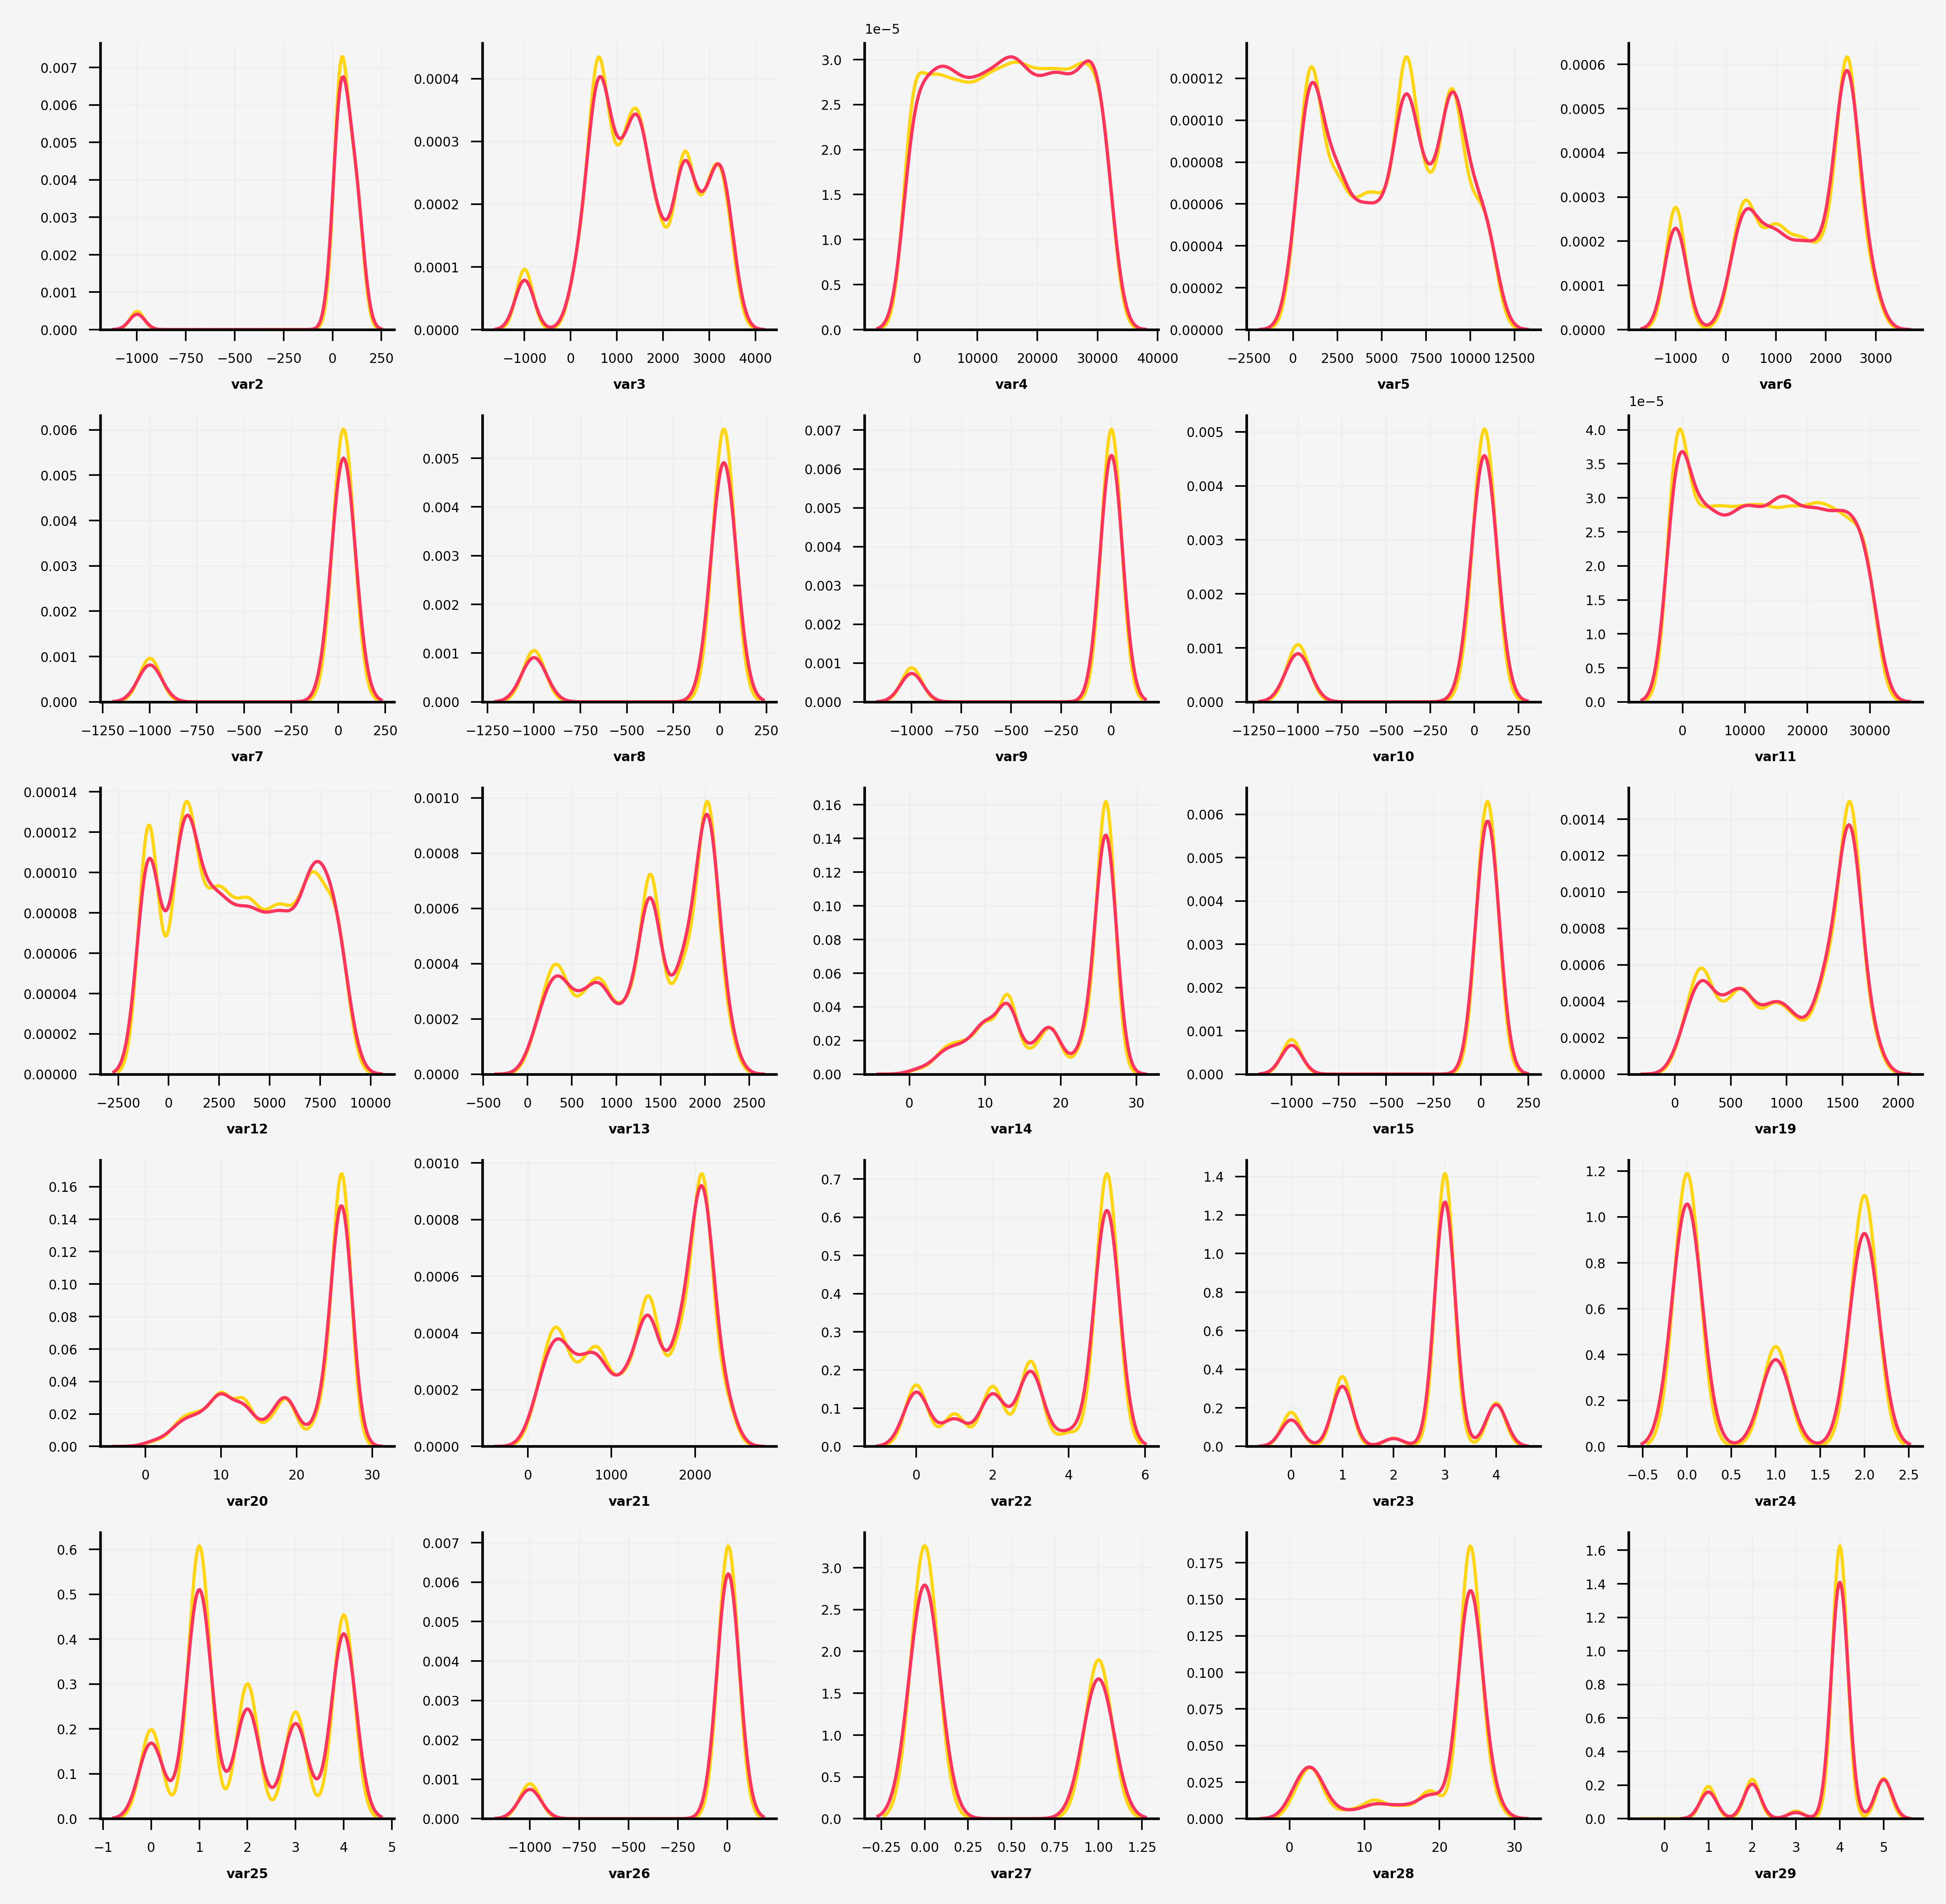

In [12]:

background_color = "#f6f5f5"
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1  

features = list(train_df.columns[1:26])

background_color = "#f6f5f5"

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1
    
run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1


plt.show()

### 4.1.2 Features Var30 - Var56

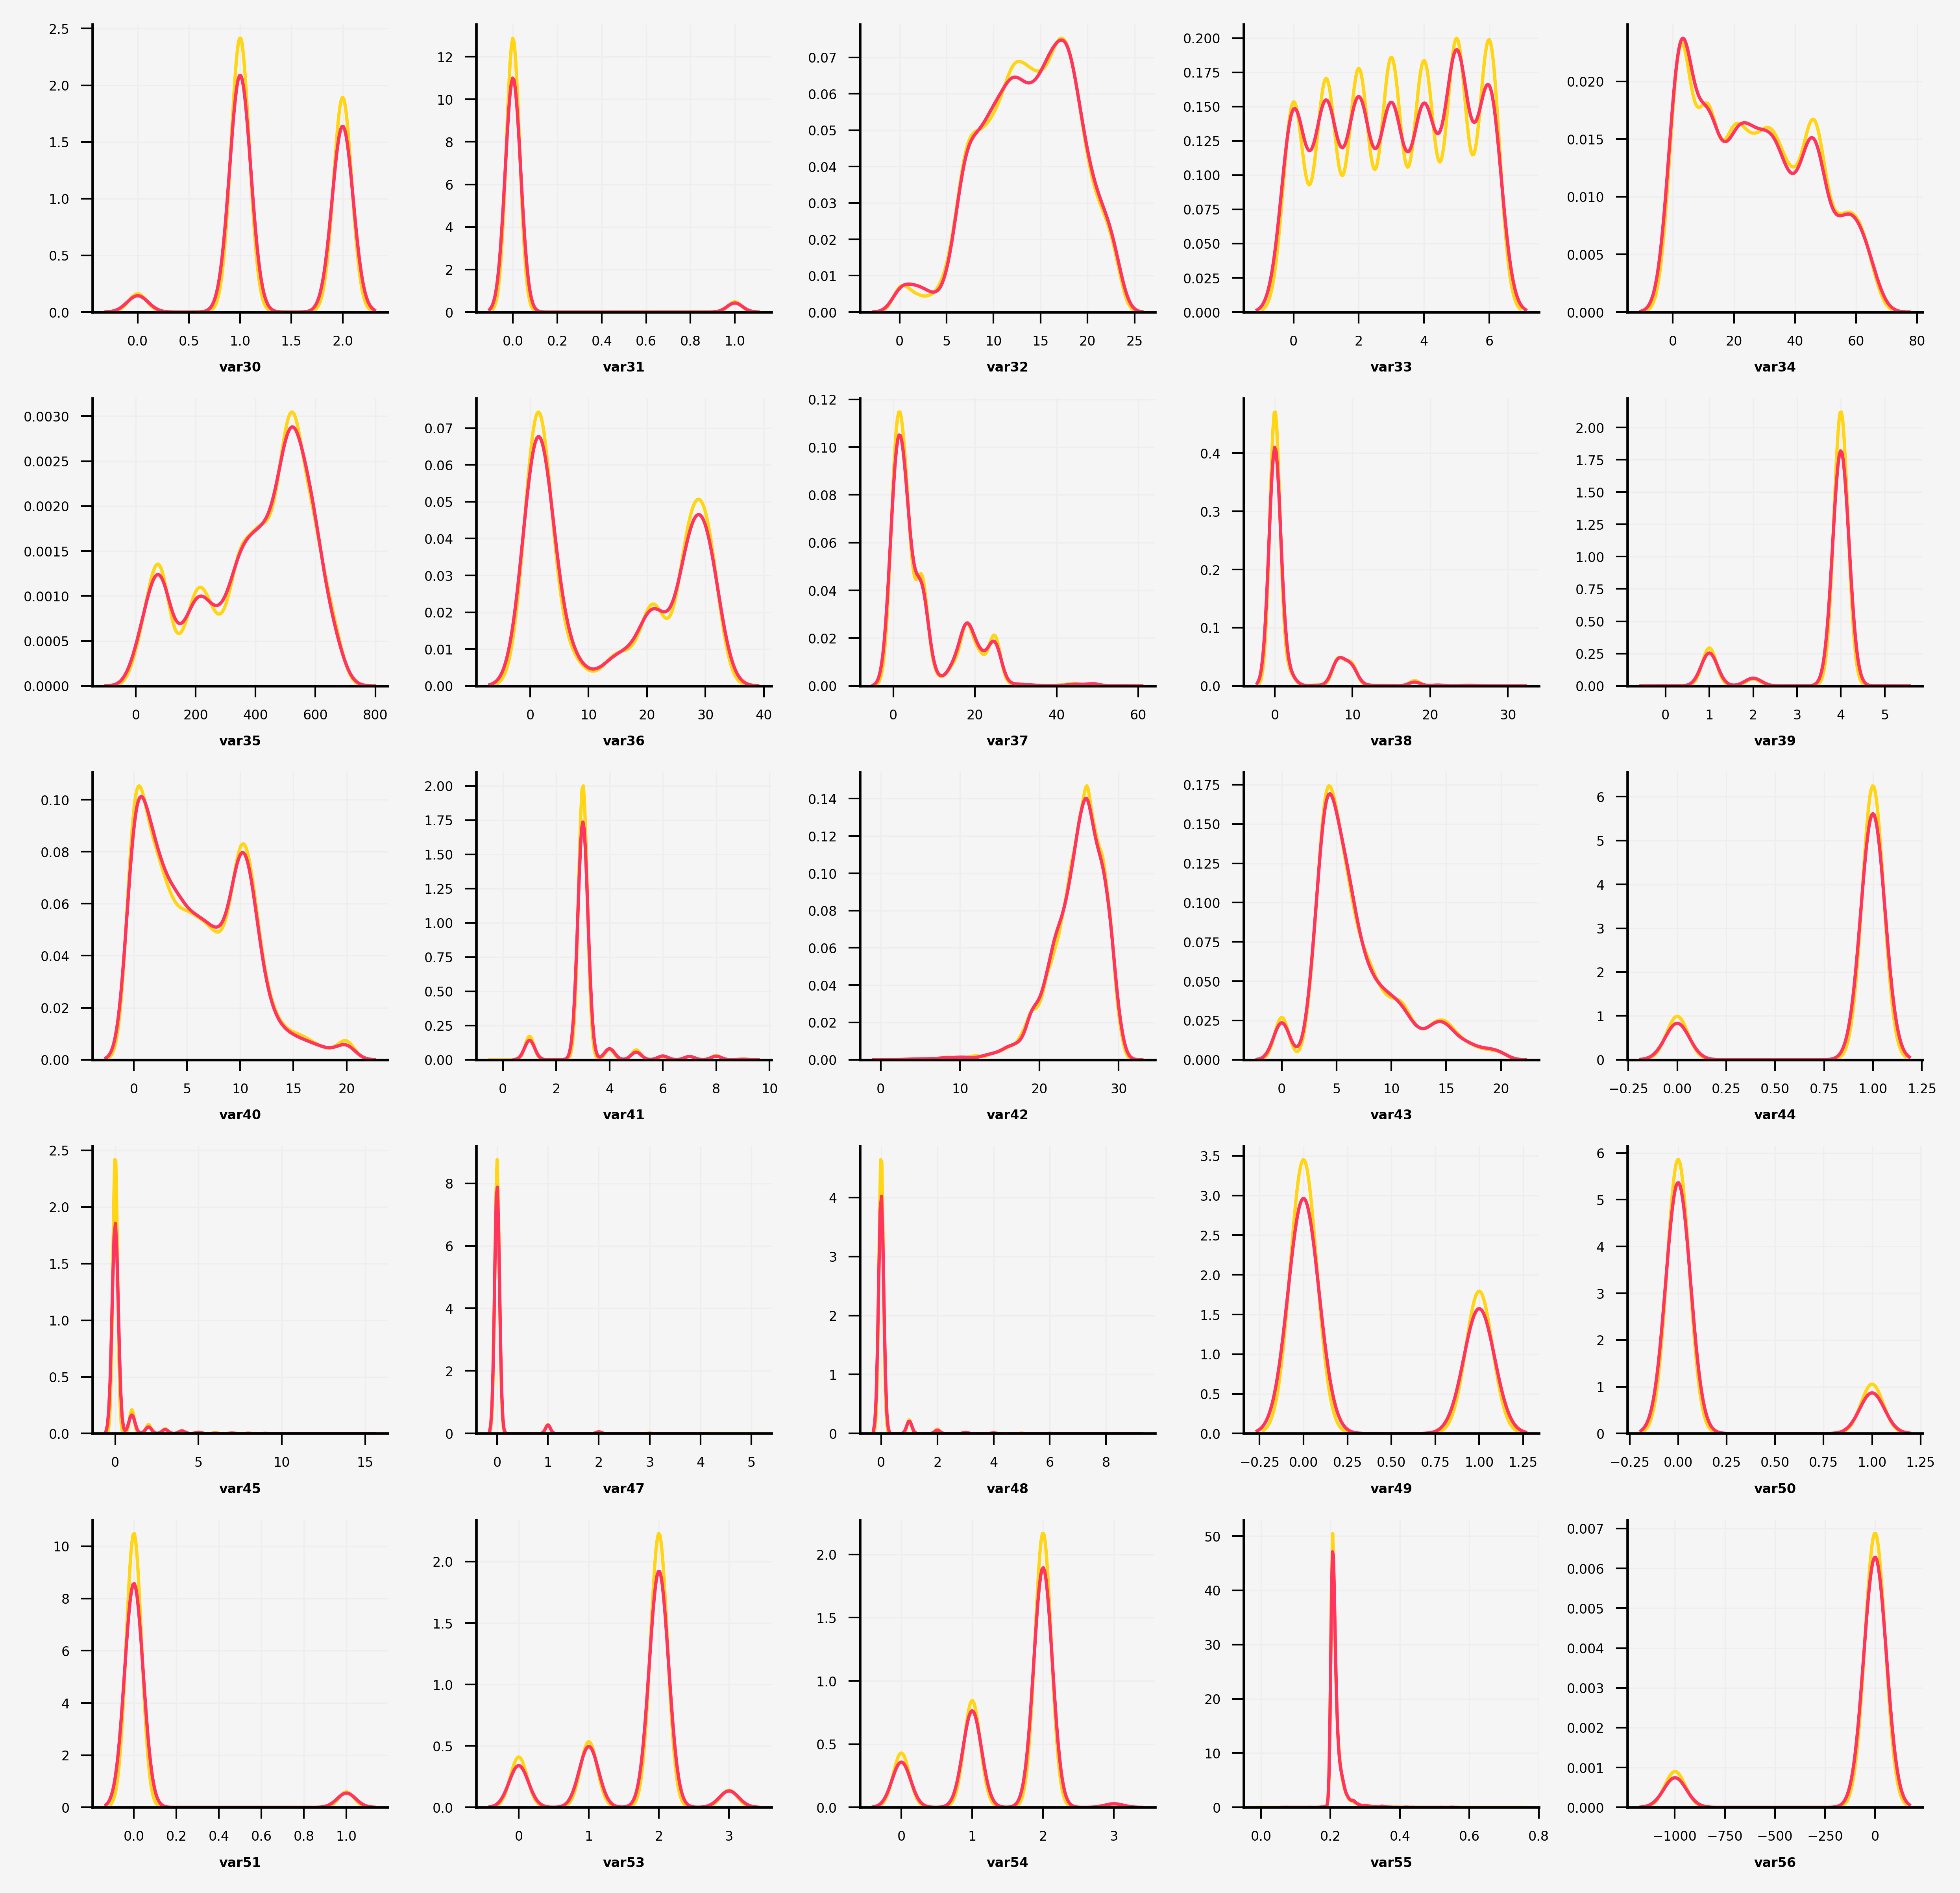

In [13]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 5):
    for col in range(0, 5):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

features = list(train_df.columns[26:51])

background_color = "#f6f5f5"

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()

### 4.1.3 Features Var59 - Var68

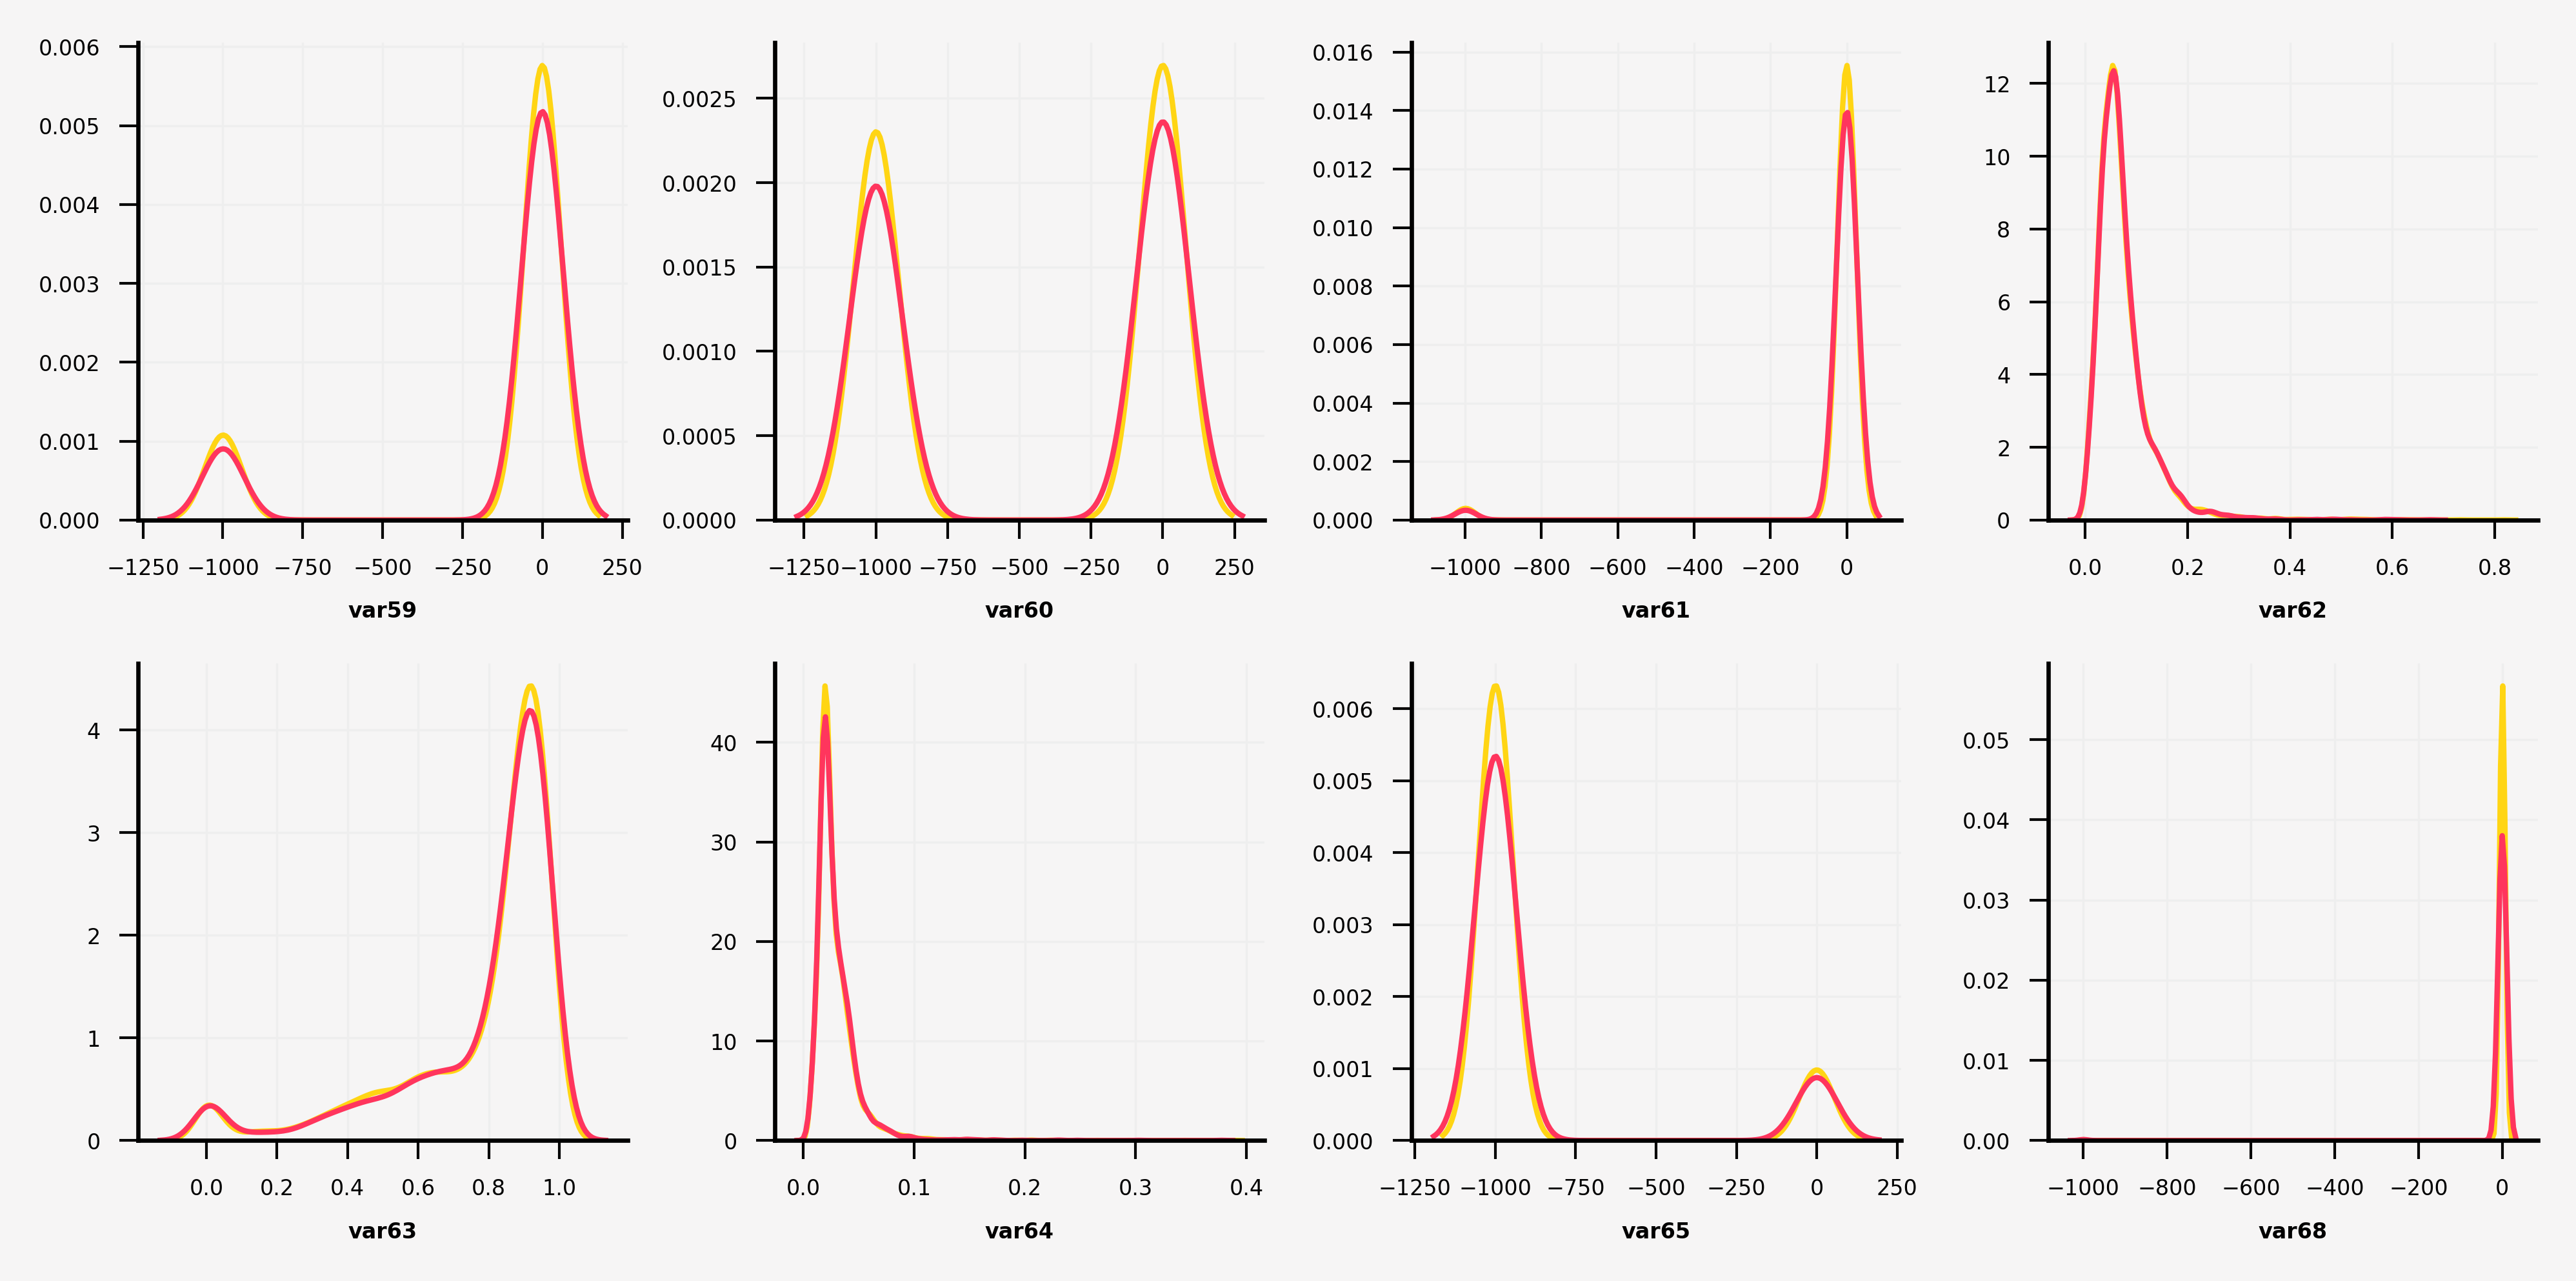

In [14]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(8, 8), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.3, hspace=0.3)

run_no = 0
for row in range(0, 2):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

features = list(train_df.columns[51:59])

background_color = "#f6f5f5"

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=train_df[col], zorder=2, alpha=1, linewidth=1, color='#ffd514')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(ax=locals()["ax"+str(run_no)], x=test_df[col], zorder=2, alpha=1, linewidth=1, color='#ff355d')
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=4, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=4, width=0.5)
    locals()["ax"+str(run_no)].xaxis.offsetText.set_fontsize(4)
    locals()["ax"+str(run_no)].yaxis.offsetText.set_fontsize(4)
    run_no += 1

plt.show()


<a id="5"></a>
# 5 Variante Alvo - Target

<a id="5.1"></a>
## 5.1 Distribuição
A variável alvo tem um valor de `0` e `1` que indica se as pessoas são público-alvo do produto ou não. Vamos ver como está a distribuição entre  `0` e `1` da variável `y`.



**Observação:**
- A proporção de pessoas que não são e são público-alvo (`0` e` 1`) é de quase 80% e 20% respectivamente, ou seja, essa variação está desbalanceado. 
- Para melhorar nossa análise e não ser afetado por esse desbalanceamento vou utilizar o método `Undersampling` mais abaixo, o que consiste em diminuir a quantidade de observações com maior número de classificação, a fim de equalizar nossos dados, para isso vou usar o cross-validation utilizando `StratifiedKFold` (cápitulo 6.2)


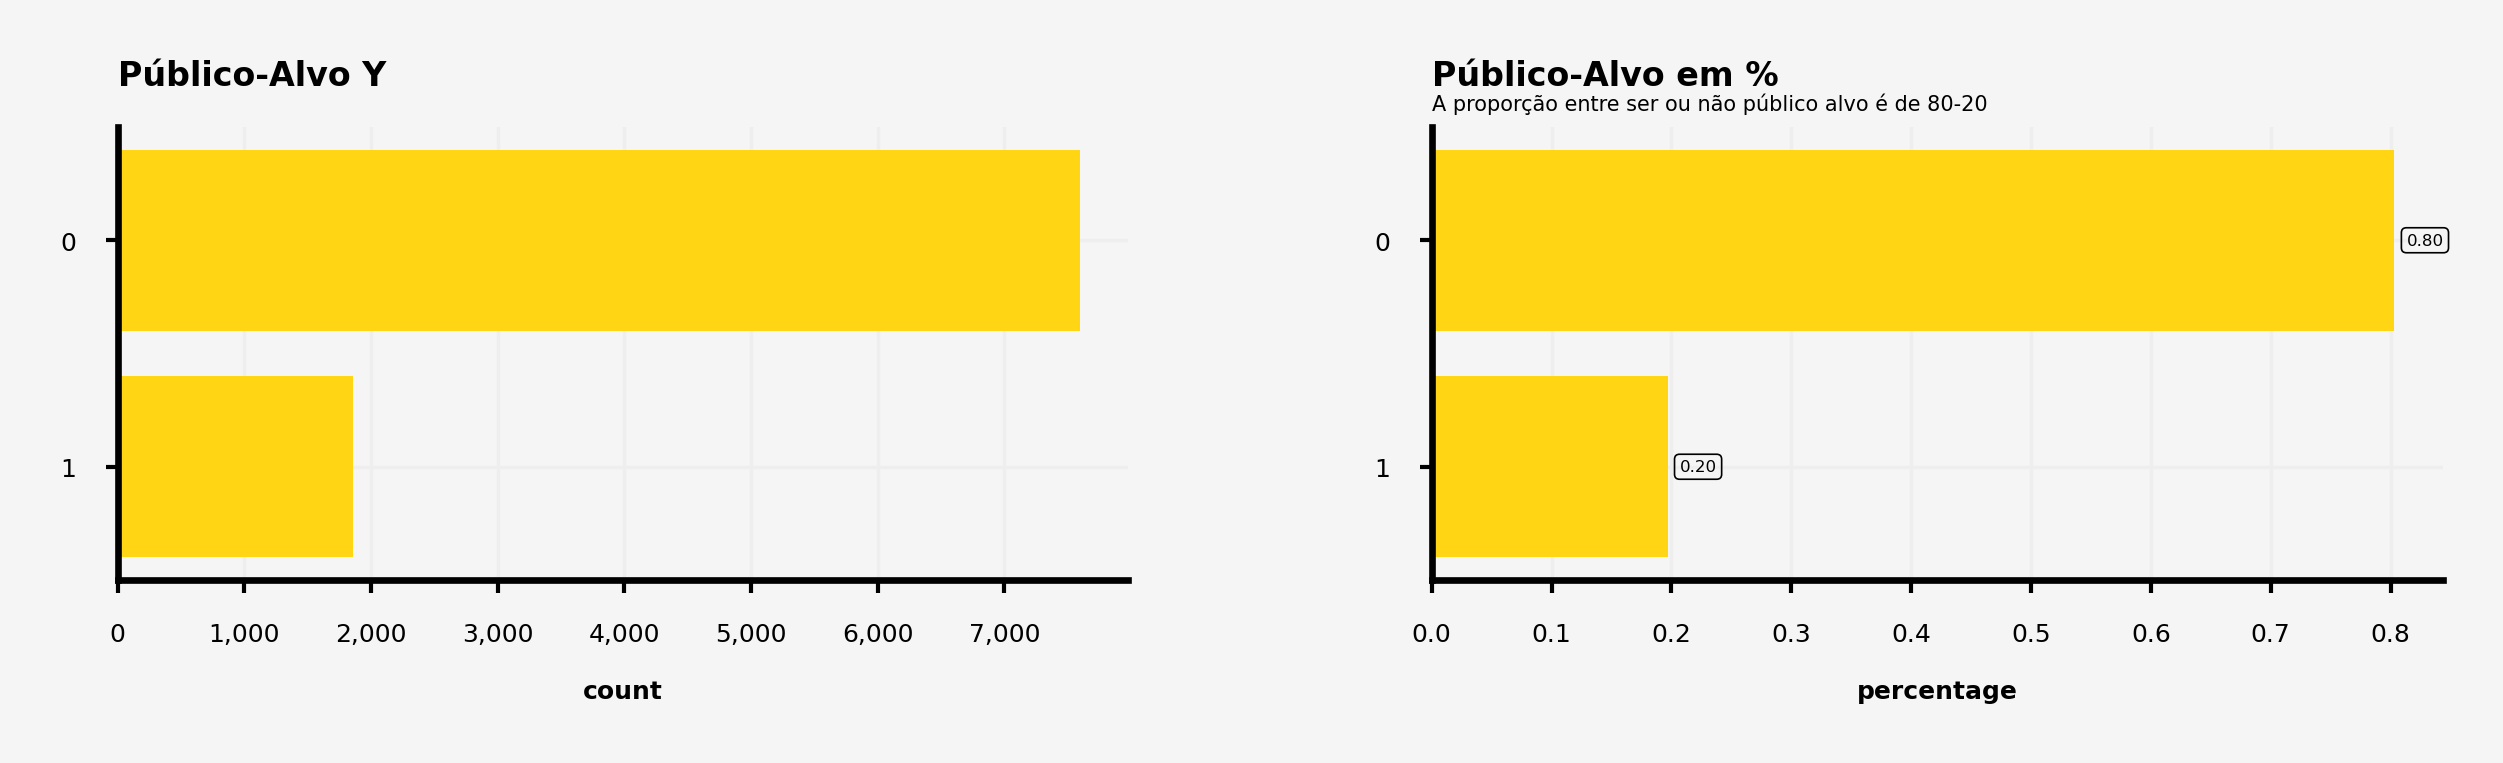

In [15]:
target_df = pd.DataFrame(train_df['y'].value_counts()).reset_index()
target_df.columns = ['y', 'count']

target_percent_df = pd.DataFrame(train_df['y'].value_counts()/train_df.shape[0]).reset_index()
target_percent_df.columns = ['y', 'count']

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=target_df['y'], x=target_df['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("count",fontsize=3, weight='bold')
ax0_sns.set_ylabel("",fontsize=3, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -0.8, 'Público-Alvo Y', fontsize=4, ha='left', va='top', weight='bold')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 10000
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=target_percent_df['y'], x=target_percent_df['count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("percentage",fontsize=3, weight='bold')
ax1_sns.set_ylabel("",fontsize=3, weight='bold')
ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -0.8, 'Público-Alvo em %', fontsize=4, ha='left', va='top', weight='bold')
ax1.text(0, -0.65, 'A proporção entre ser ou não público alvo é de 80-20', fontsize=2.5, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=2, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

<a id="5.2"></a>
## 5.2 Padronizando os Dados de teste e treino
A transformação e padronização dos dados  é uma pratica para evitar que algoritmo do modelo fique enviesado para as variáveis com maior ordem de grandeza. Para isso utilizo duas formas diferentes, a primeira vou incluir algumas estatísticas básicas para cada linha dos dados, como `valor mínimo`, `máximo`, `média` e `desvio-padrão`. 

A segunda padronização será utilizando `StandardScaler` da biblioteca sklearn, ele basicamente remove a média e escalona para a variância da unidade. A amostra x é calculada como:

`z = (x - u) / s`,

onde `u` é a média das amostras ou zero, o `s` é o desvio padrão dessas mesmas amostras.


In [16]:
test_df.shape

(4661, 59)

In [17]:
# Separando as Features da variante alvo 

features= [col for col in train_df.columns if col != 'y']

features= [col for col in test_df.columns if col != 'y']

In [18]:
# Adicionando estatítica básica em cada linha

train_df['min_row'] = train_df[features].min(axis=1)
train_df['max_row'] = train_df[features].max(axis=1)
train_df['mean_row'] = train_df[features].mean(axis=1)
train_df['std_row'] = train_df[features].std(axis=1)

test_df['min_row'] = test_df[features].min(axis=1)
test_df['max_row'] = test_df[features].max(axis=1)
test_df['mean_row'] = test_df[features].mean(axis=1)
test_df['std_row'] = test_df[features].std(axis=1)

features += ['min_row', 'max_row', 'mean_row', 'std_row']

In [19]:
#Padronizando
scaler = preprocessing.StandardScaler()

train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [20]:
train_df.shape

(9462, 64)


<a id="6"></a>
# 6 Modelo

Os modelos escolhidos foram `Light GBM` e `XGBoost`.O primeiro a escolha foi devido ao ótimo compartamento e performance com o tipo de dados apresentado. Esse modelo consiste em uma estrutura de  gradient boosting que usa algoritmo de aprendizagem baseado em árvore. Esse modelo tem seu diferencial perante aos demais modelos que é o cresciemtno das as árvores verticalmente enquanto outro algoritmo cresce as  árvores horizontalmente, ou seja, o `Light GBM` escolherá a folha com perda máxima de delta para crescer. Ao crescer a mesma folha, o algoritmo irá reduzir mais perdas do que os demais algoritimos. 

Já o `XGBoost` é um dos algoritimos que apresenta resultados muito satisfatótios com problemas de previsão envolvendo dados estruturados/tabulares, ele utiliza uma categoria de algoritmo baseada em Decision Trees (árvores de decisão) com Gradient Boosting assim como Light GBM.


Os modelos serão avaliados usando validação do `StratifiedKFold`. 



In [21]:
# Renomeando os dados de treino e teste para facilitar o uso no modelo
X = train_df[features].copy()
y = train_df['y'].copy()
X_test = test_df.copy()

In [22]:
#Separando os dados de treino novamente em treino e teste para rodar a otimização dos hiperparâmetros
XRtrain, XRtest, yrtrain, yrtest = train_test_split(X, y, train_size = 0.33)

## 6.1 Otimização de Hiperparâmetros

Como dito acima, os modelos serão avaliados usando validação do StratifiedKFold e como otimizador de hiperparâmetros utilizarei o `dummy minimize` da biblioteca `Skopt`, onde ele acha os melhores hiperparâmetros que  ajudarão a achar o melhor resultado possível para nossos modelos. Os hiperparametros utilizados à serem otimizados são:

- learning_rate: Aumento da taxa de apredizagem

- num_leaves: Número de árvores no modelo (Somente para o Light GBM)

- min_child_samples: Número mínimo que os dados necessitam em um nó (Somente para o Light GBM)

- subsample: Proporção da sub-amostra da instância de treinamento

- colsample_bytree: Proporção da sub-amostra de colunas ao construir cada árvore.

**Observação**

Seguindo o manual do XGBoost, não é aconselhável alterar os hiperparâmetros num_leaves e min_child_samples, por conta disso utilizarei somente no Light GBM o otimizador nesses hiperparâmetros

As escolhas dos intervalos dos valores abaixo foi propositalmente aleátorio, porém respeitando valores sugeridos dos manuais 

### 6.1.1 Otimização no LGBMClassifier

In [23]:
# Função para buscar a otimizalção dos hiperparâmetros que serão utilizados.

# Seguindo o manual da biblioteca Skopt, o número ideal de "calls" é de 100 vezes.


def model_training(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    n_estimators = params[5]
    
    print (params, '\n')
    
    model = LGBMClassifier()
    model.fit(XRtrain, yrtrain)
    
    p = model.predict_proba(XRtest)[:,1]
    
    return - roc_auc_score(yrtest,p)



space = [(1e-3, 1e-1, "log-uniform"),
         (2,135),
         (1,100),
         (0.05, 1.0),
         (0.1 , 1.0),
        (100,350)]

resultado_lgmc = dummy_minimize(model_training, space, random_state = 42,  verbose = True ,n_calls = 100)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 16, 72, 0.6187255599871848, 0.2404167763981929, 310] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4829
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 2 started. Evaluating function at random point.
[0.0015847101210439095, 89, 100, 0.18572347702584374, 0.6857996256539677, 152] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4751
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 3 started. Evaluating function at random point.
[0.08706020878304858, 39, 2, 0.2227337188467456, 0.2650640588680905, 303] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5068
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 4 started. Evaluating function at random point.
[0.01672269700618368, 90, 49, 0.5485359272454697, 0.45987487454373, 319] 

Iteration No: 4 ended. Evaluation done at ra

Iteration No: 31 ended. Evaluation done at random point.
Time taken: 0.3237
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 32 started. Evaluating function at random point.
[0.005439591236568527, 117, 98, 0.65185322522285, 0.5821972156672827, 339] 

Iteration No: 32 ended. Evaluation done at random point.
Time taken: 0.3345
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 33 started. Evaluating function at random point.
[0.03950847349286012, 125, 59, 0.22719258487986155, 0.13669762739928754, 247] 

Iteration No: 33 ended. Evaluation done at random point.
Time taken: 0.3215
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 34 started. Evaluating function at random point.
[0.004486604735590719, 91, 67, 0.8190259938327298, 0.4137993885625565, 298] 

Iteration No: 34 ended. Evaluation done at random point.
Time taken: 0.3722
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 35 started. Evaluating fun

Iteration No: 61 ended. Evaluation done at random point.
Time taken: 0.3235
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 62 started. Evaluating function at random point.
[0.02382318380657105, 130, 58, 0.9194530412451566, 0.4981170067579941, 195] 

Iteration No: 62 ended. Evaluation done at random point.
Time taken: 0.3144
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 63 started. Evaluating function at random point.
[0.012544499236626445, 49, 89, 0.6771875078818448, 0.3519405072513486, 115] 

Iteration No: 63 ended. Evaluation done at random point.
Time taken: 0.3438
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 64 started. Evaluating function at random point.
[0.010799223138390417, 70, 22, 0.7435373507337277, 0.14294451492248392, 253] 

Iteration No: 64 ended. Evaluation done at random point.
Time taken: 0.3334
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 65 started. Evaluating fun

Iteration No: 91 ended. Evaluation done at random point.
Time taken: 0.3214
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 92 started. Evaluating function at random point.
[0.06890193690645952, 21, 57, 0.5469429519616414, 0.6664587743217364, 113] 

Iteration No: 92 ended. Evaluation done at random point.
Time taken: 0.3352
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 93 started. Evaluating function at random point.
[0.003881395461260575, 2, 54, 0.6050985963269453, 0.9110422094418902, 284] 

Iteration No: 93 ended. Evaluation done at random point.
Time taken: 0.3131
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 94 started. Evaluating function at random point.
[0.06768753263144213, 75, 96, 0.10497070286982203, 0.4550696187473169, 251] 

Iteration No: 94 ended. Evaluation done at random point.
Time taken: 0.3133
Function value obtained: -0.8667
Current minimum: -0.8667
Iteration No: 95 started. Evaluating functi

### 6.1.2 Otimização no XGBC Classifier

In [24]:
def model_training(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    n_estimators = params[5]
    
    print (params, '\n')
    
    model = XGBClassifier()
    model.fit(XRtrain, yrtrain)
    
    p = model.predict_proba(XRtest)[:,1]
    
    return - roc_auc_score(yrtest,p)



space = [(1e-3, 1e-1, "log-uniform"),
         (2,135),
         (1,100),
         (0.05, 1.0),
         (0.1 , 1.0),
        (100,350)]

resultado_XGBC= dummy_minimize(model_training, space, random_state = 42,  verbose = True ,n_calls = 100)

Iteration No: 1 started. Evaluating function at random point.
[0.03918194347141743, 16, 72, 0.6187255599871848, 0.2404167763981929, 310] 

[20:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2646
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 2 started. Evaluating function at random point.
[0.0015847101210439095, 89, 100, 0.18572347702584374, 0.6857996256539677, 152] 

[20:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd

Iteration No: 15 ended. Evaluation done at random point.
Time taken: 0.6155
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 16 started. Evaluating function at random point.
[0.053236175947515035, 73, 12, 0.36435312361001676, 0.1572025152574213, 250] 

[20:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 16 ended. Evaluation done at random point.
Time taken: 0.6059
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 17 started. Evaluating function at random point.
[0.021761183209050426, 38, 99, 0.6117328983223409, 0.3472496136910578, 134] 

[20:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

Iteration No: 29 ended. Evaluation done at random point.
Time taken: 0.6796
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 30 started. Evaluating function at random point.
[0.0011643980401875858, 130, 19, 0.6966701789770285, 0.5778411249854228, 317] 

[20:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 30 ended. Evaluation done at random point.
Time taken: 0.6668
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 31 started. Evaluating function at random point.
[0.09360540102485383, 69, 55, 0.7735386345622818, 0.3138737895931597, 137] 

[20:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

Iteration No: 43 ended. Evaluation done at random point.
Time taken: 0.5989
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 44 started. Evaluating function at random point.
[0.003391600849438614, 39, 51, 0.8974442274182577, 0.6680247633975367, 325] 

[20:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 44 ended. Evaluation done at random point.
Time taken: 0.5879
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 45 started. Evaluating function at random point.
[0.005013682353796104, 98, 28, 0.6854778566799448, 0.8777508085647129, 160] 

[20:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

Iteration No: 58 ended. Evaluation done at random point.
Time taken: 0.5785
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 59 started. Evaluating function at random point.
[0.011553385460530906, 48, 99, 0.6555584064232963, 0.7534822003503955, 112] 

[20:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 59 ended. Evaluation done at random point.
Time taken: 0.5958
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 60 started. Evaluating function at random point.
[0.08691079733347115, 107, 30, 0.08901414092948201, 0.4589388113003151, 118] 

[20:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

Iteration No: 72 ended. Evaluation done at random point.
Time taken: 0.6321
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 73 started. Evaluating function at random point.
[0.004710949294160661, 91, 8, 0.4161267899172868, 0.7134523020755108, 261] 

[20:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 73 ended. Evaluation done at random point.
Time taken: 0.5961
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 74 started. Evaluating function at random point.
[0.0033219191364984623, 59, 75, 0.8835984128507004, 0.7615639394234973, 120] 

[20:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default

Iteration No: 86 ended. Evaluation done at random point.
Time taken: 0.5881
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 87 started. Evaluating function at random point.
[0.0057013168855230235, 92, 74, 0.9110366658399993, 0.20007773407553622, 294] 

[20:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iteration No: 87 ended. Evaluation done at random point.
Time taken: 0.5748
Function value obtained: -0.8616
Current minimum: -0.8616
Iteration No: 88 started. Evaluating function at random point.
[0.0032163577436819433, 127, 58, 0.753925167865135, 0.7904753677977147, 226] 

[20:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defa


<a id="6.1"></a>
## 6.2 Modelo Base
- Os dois modelos foram avalidados via `StratifiedKFold (cross-validation)`

**Resultado:**
- Os 2 modelos apresentaram resultados bem semelhantes com AUC próximo a `0.88`, ou seja,as diferenças são muito pequenas entre os modelos.
- `XGBoost Classifier` foi o melhor modelo analisado `0.888`.
- O segundo colocado foi `LGBM Classifier` com `0.886`.

<a id="6.1.2"></a>
### 6.2.1 LGBM Classifier

In [25]:
lgbm_params_rs = {
    "objective": "binary",
    "learning_rate": resultado_lgmc.x[0],
    'num_leaves': resultado_lgmc.x[1],
    'min_child_samples': resultado_lgmc.x[2],
    'subsample':resultado_lgmc.x[3],
    'colsample_bytree': resultado_lgmc.x[4],
    'n_estimators': resultado_lgmc.x[5]
}



In [26]:
model_LGBMC = LGBMClassifier(**lgbm_params_rs)
model_LGBMC

LGBMClassifier(colsample_bytree=0.2404167763981929,
               learning_rate=0.03918194347141743, min_child_samples=72,
               n_estimators=310, num_leaves=16, objective='binary',
               subsample=0.6187255599871848)

In [27]:
splits = 5
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_auc = 0

for num, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    
    
    model_LGBMC.fit(X_train, y_train,
              verbose=False,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric="auc",
              early_stopping_rounds=200,
              )
    

    
    preds += model_LGBMC.predict_proba(X_test)[:, 1] / splits
   
   
    
    model_fi += model_LGBMC.feature_importances_ / splits
    
    oof_preds[valid_idx] = model_LGBMC.predict_proba(X_valid)[:, 1]
    
    fold_auc = roc_auc_score(y_valid, oof_preds[valid_idx])
    print(f"Fold {num} ROC AUC: {fold_auc}")

    total_mean_auc += fold_auc / splits
    
print(f"\nOverall ROC AUC: {total_mean_auc}")

Fold 0 ROC AUC: 0.8950719627486948
Fold 1 ROC AUC: 0.8850818399887117
Fold 2 ROC AUC: 0.8905772495755518
Fold 3 ROC AUC: 0.8811438879456707
Fold 4 ROC AUC: 0.8825339558573854

Overall ROC AUC: 0.8868817792232028


### 6.1.3 XGBC Classifier

In [28]:
# Aqui foi retirado os hiperparâmetros num_eaves e min_child_samples, seguindo o manual do modelo, como dito acima

xgb_params = {
    "learning_rate": resultado_XGBC.x[0],
    #'num_leaves': resultado.x[1],
   # 'min_child_samples': resultado.x[2],
    'subsample':resultado_XGBC.x[3],
    'colsample_bytree': resultado_XGBC.x[4],
    'n_estimators':resultado_XGBC.x[5]
}




In [29]:
model_XGBC = XGBClassifier(**xgb_params)
model_XGBC

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.2404167763981929,
              gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.03918194347141743,
              max_delta_step=None, max_depth=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=310,
              n_jobs=None, num_parallel_tree=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.6187255599871848, tree_method=None,
              validate_parameters=None, verbosity=None)

In [30]:
splits = 5
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
total_mean_auc = 0

for num, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    
    
    model_XGBC.fit(X_train, y_train,
              verbose=False,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric="auc",
              early_stopping_rounds=200,
              )
    

    
    preds += model_XGBC.predict_proba(X_test)[:, 1] / splits
   
   
    
    model_fi += model_XGBC.feature_importances_ / splits
    
    oof_preds[valid_idx] = model_XGBC.predict_proba(X_valid)[:, 1]
    
    fold_auc = roc_auc_score(y_valid, oof_preds[valid_idx])
    print(f"Fold {num} ROC AUC: {fold_auc}")

    total_mean_auc += fold_auc / splits
    
print(f"\nOverall ROC AUC: {total_mean_auc}")

Fold 0 ROC AUC: 0.8964988711725695
Fold 1 ROC AUC: 0.8902003668689148
Fold 2 ROC AUC: 0.8898256225240522
Fold 3 ROC AUC: 0.8826100028296548
Fold 4 ROC AUC: 0.883276740237691

Overall ROC AUC: 0.8884823207265764


# 6 Conclusão

Basicamente em todas as áreas do mercado o que se busca é a eficiência e produtividade, ou seja, ser mais eficaz em menos tempo e com um mínimo risco de erro nessas ações. O mercado de telemarketing não é diferente das demais áreas, uma ligação feita por uma empresa que não acerte o público-alvo correto com algum produto específico acarretará estresse, perda de tempo e improdutividade das pessoas envolvidas.

Com isso esse projeto teve o objetivo, por meio dos dados disponíveis, criar um modelo onde pudesse prever uma assertividade em possíveis clientes. Após uma revisão e análise dos dados das variáveis disponíveis, conseguimos construir dois modelos dos quais possuem uma acurácia muito próxima entre eles de 0,88, portanto utilizando qualquer desses dois modelos,esse projeto consiguirá melhorar e desenvolver a produtividade dos resultados de vendas dessa empresa, evitando uma possível falha na comunicação empresa-cliente.
